In [6]:
import warnings
warnings.filterwarnings('ignore')


In [7]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns            # For statistical data visualization
import plotly.express as px
import bokeh
import folium

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [8]:
df = pd.read_csv('eco behv.csv')

In [6]:
df.head(10)

Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   
5          106  Female   37        Houston          Bronze       440.80   
6          107  Female   31       New York            Gold      1150.60   
7          108    Male   35    Los Angeles          Silver       800.90   
8          109  Female   41        Chicago          Bronze       495.25   
9          110    Male   28  San Francisco            Gold      1520.10   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   
5                8             3.1             False   
6               15             4.5              True   
7               12             4.2             False   
8               10             3.6              True   
9               21             4.8             False   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3                        12          Satisfied  
4                        55        Unsatisfied  
5                        22            Neutral  
6                        28          Satisfied  
7                        14            Neutral  
8                        40        Unsatisfied  
9                         9          Satisfied

In [7]:
df.tail(10)

Customer ID  Gender  Age           City Membership Type  Total Spend  \
340          441  Female   37        Houston          Bronze       450.80   
341          442  Female   31       New York            Gold      1140.60   
342          443    Male   35    Los Angeles          Silver       800.90   
343          444  Female   41        Chicago          Bronze       475.25   
344          445    Male   28  San Francisco            Gold      1480.10   
345          446    Male   32          Miami          Silver       660.30   
346          447  Female   36        Houston          Bronze       470.50   
347          448  Female   30       New York            Gold      1190.80   
348          449    Male   34    Los Angeles          Silver       780.20   
349          450  Female   43        Chicago          Bronze       515.75   

     Items Purchased  Average Rating  Discount Applied  \
340                7             3.4             False   
341               15             4.5              True   
342               12             4.1             False   
343                9             3.6              True   
344               21             4.9             False   
345               10             3.8              True   
346                8             3.0             False   
347               16             4.5              True   
348               11             4.2             False   
349               10             3.3              True   

     Days Since Last Purchase Satisfaction Level  
340                        32            Neutral  
341                        36          Satisfied  
342                        20            Neutral  
343                        48        Unsatisfied  
344                        13          Satisfied  
345                        42        Unsatisfied  
346                        27            Neutral  
347                        28          Satisfied  
348                        21            Neutral  
349                        49        Unsatisfied

In [8]:
df.sample(10)

Customer ID  Gender  Age           City Membership Type  Total Spend  \
297          398    Male   32          Miami          Silver       660.30   
19           120    Male   34    Los Angeles          Silver       790.20   
189          290    Male   28  San Francisco            Gold      1500.10   
152          253  Female   43        Chicago          Bronze       505.75   
64           165    Male   26          Miami          Silver       690.60   
190          291    Male   32          Miami          Silver       670.30   
28           129    Male   32          Miami          Silver       670.30   
192          293  Female   30       New York            Gold      1190.80   
71           172  Female   37        Houston          Bronze       420.80   
247          348  Female   41        Chicago          Bronze       490.25   

     Items Purchased  Average Rating  Discount Applied  \
297               10             3.8              True   
19                11             4.0             False   
189               21             4.9             False   
152               10             3.3              True   
64                12             3.9              True   
190               10             3.8              True   
28                10             3.8              True   
192               16             4.5              True   
71                 7             3.1             False   
247                9             3.6              True   

     Days Since Last Purchase Satisfaction Level  
297                        38        Unsatisfied  
19                         16            Neutral  
189                        10          Satisfied  
152                        39        Unsatisfied  
64                         47        Unsatisfied  
190                        33        Unsatisfied  
28                         33        Unsatisfied  
192                        20          Satisfied  
71                         21                NaN  
247                        40        Unsatisfied

In [9]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [10]:
df.describe(include='all').T

count unique        top freq        mean  \
Customer ID               350.0    NaN        NaN  NaN       275.5   
Gender                      350      2     Female  175         NaN   
Age                       350.0    NaN        NaN  NaN   33.597143   
City                        350      6   New York   59         NaN   
Membership Type             350      3       Gold  117         NaN   
Total Spend               350.0    NaN        NaN  NaN  845.381714   
Items Purchased           350.0    NaN        NaN  NaN        12.6   
Average Rating            350.0    NaN        NaN  NaN    4.019143   
Discount Applied            350      2       True  175         NaN   
Days Since Last Purchase  350.0    NaN        NaN  NaN   26.588571   
Satisfaction Level          348      3  Satisfied  125         NaN   

                                 std    min     25%    50%     75%     max  
Customer ID               101.180532  101.0  188.25  275.5  362.75   450.0  
Gender                           NaN    NaN     NaN    NaN     NaN     NaN  
Age                         4.870882   26.0    30.0   32.5    37.0    43.0  
City                             NaN    NaN     NaN    NaN     NaN     NaN  
Membership Type                  NaN    NaN     NaN    NaN     NaN     NaN  
Total Spend               362.058695  410.8   502.0  775.2  1160.6  1520.1  
Items Purchased             4.155984    7.0     9.0   12.0    15.0    21.0  
Average Rating              0.580539    3.0     3.5    4.1     4.5     4.9  
Discount Applied                 NaN    NaN     NaN    NaN     NaN     NaN  
Days Since Last Purchase   13.440813    9.0    15.0   23.0    38.0    63.0  
Satisfaction Level               NaN    NaN     NaN    NaN     NaN     NaN

In [11]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [12]:
df.dropna()

Customer ID  Gender  Age           City Membership Type  Total Spend  \
0            101  Female   29       New York            Gold      1120.20   
1            102    Male   34    Los Angeles          Silver       780.50   
2            103  Female   43        Chicago          Bronze       510.75   
3            104    Male   30  San Francisco            Gold      1480.30   
4            105    Male   27          Miami          Silver       720.40   
..           ...     ...  ...            ...             ...          ...   
345          446    Male   32          Miami          Silver       660.30   
346          447  Female   36        Houston          Bronze       470.50   
347          448  Female   30       New York            Gold      1190.80   
348          449    Male   34    Los Angeles          Silver       780.20   
349          450  Female   43        Chicago          Bronze       515.75   

     Items Purchased  Average Rating  Discount Applied  \
0                 14             4.6              True   
1                 11             4.1             False   
2                  9             3.4              True   
3                 19             4.7             False   
4                 13             4.0              True   
..               ...             ...               ...   
345               10             3.8              True   
346                8             3.0             False   
347               16             4.5              True   
348               11             4.2             False   
349               10             3.3              True   

     Days Since Last Purchase Satisfaction Level  
0                          25          Satisfied  
1                          18            Neutral  
2                          42        Unsatisfied  
3                          12          Satisfied  
4                          55        Unsatisfied  
..                        ...                ...  
345                        42        Unsatisfied  
346                        27            Neutral  
347                        28          Satisfied  
348                        21            Neutral  
349                        49        Unsatisfied  

[348 rows x 11 columns]

In [13]:
unique_customers = df['Customer ID'].nunique()
duplicate_ids = df.duplicated(subset='Customer ID').any()
print(f'Number of Unique Customers: {unique_customers}\nPresence of any duplicate id? {duplicate_ids}')

Number of Unique Customers: 350
Presence of any duplicate id? False


Text(0.5, 1.0, 'Gender Distribution')

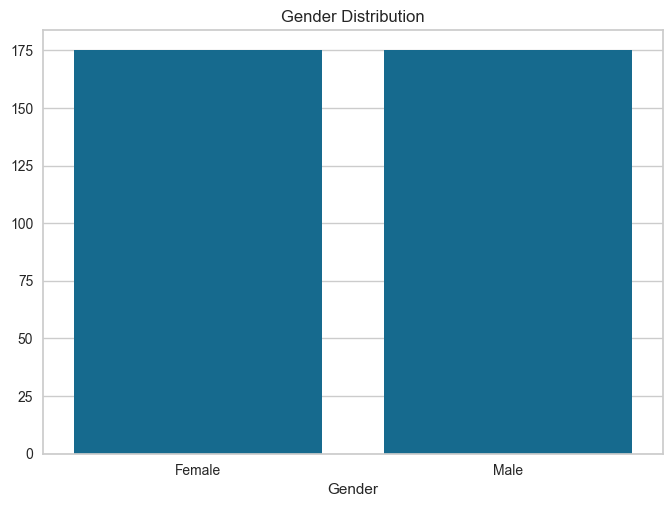

In [14]:
# Analyze gender distribution
gender_distribution = df['Gender'].value_counts()
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Gender Distribution')

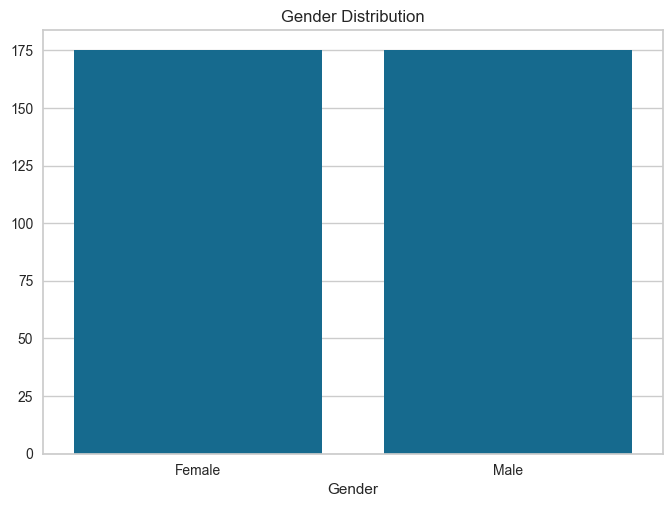

In [15]:
# Analyze gender distribution
gender_distribution = df['Gender'].value_counts()
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Age Distribution')

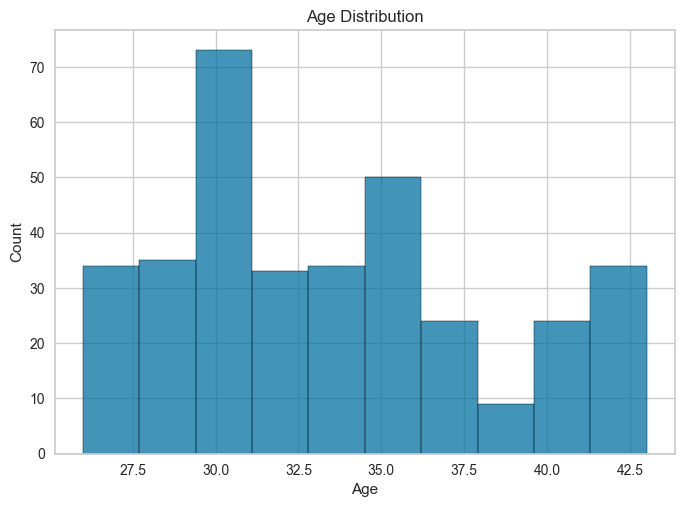

In [16]:
# Analyze age distribution
sns.histplot(df['Age'])
plt.title('Age Distribution')

In [24]:
# Segment customers into age groups
age_groups = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '60+'])
df['Age Group'] = age_groups

Text(0.5, 1.0, 'Average Spending by City')

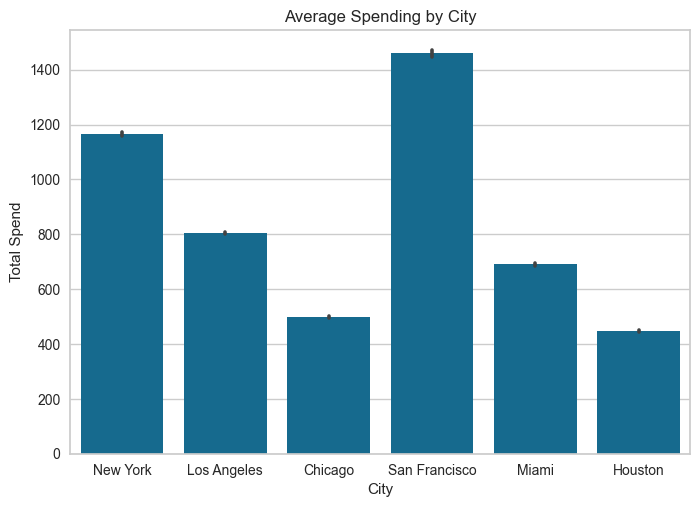

In [25]:
# Explore spending patterns based on the city
sns.barplot(x='City', y='Total Spend', data=df)
plt.title('Average Spending by City')

Text(0.5, 1.0, 'Membership Type Distribution')

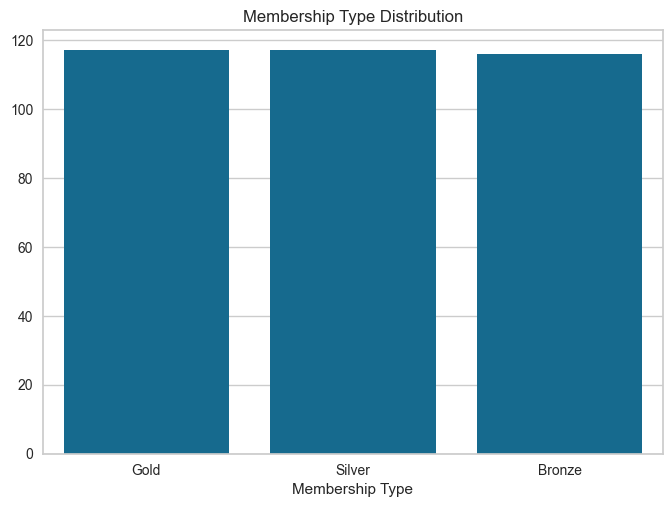

In [27]:
# Analyze the distribution of membership types
membership_distribution = df['Membership Type'].value_counts()
sns.barplot(x=membership_distribution.index, y=membership_distribution.values)
plt.title('Membership Type Distribution')

In [9]:
# Analyze the average number of items purchased per customer
avg_items_purchased = df['Items Purchased'].mean()

# Explore correlations between the number of items purchased and other variables
items_vs_spend = df.groupby('Items Purchased')['Total Spend'].mean()
px.bar(x=items_vs_spend.index, y=items_vs_spend.values, labels={'x':'Items Purchased', 'y':'Average Spend'}, title='Average Spending by Number of Items Purchased')

In [10]:
# Investigate correlations with spending or satisfaction
membership_vs_spend = df.groupby('Membership Type')['Total Spend'].mean()
px.bar(x=membership_vs_spend.index, y=membership_vs_spend.values, labels={'x':'Membership Type', 'y':'Average Spend'}, title='Average Spending by Membership Type')

Text(0.5, 1.0, 'Average Rating Distribution')

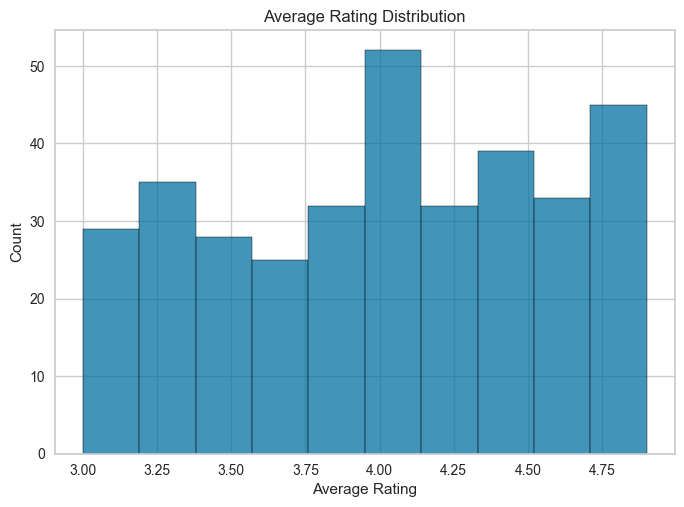

In [11]:
# Analyze the distribution of average ratings
sns.histplot(df['Average Rating'])
plt.title('Average Rating Distribution')

In [12]:
# Explore correlations between satisfaction levels and other variables
rating_vs_spend = df.groupby('Average Rating')['Total Spend'].mean()
px.bar(x=rating_vs_spend.index, y=rating_vs_spend.values, labels={'x':'Average Rating', 'y':'Average Spend'}, title='Average Spending by Average Rating')

Text(0.5, 1.0, 'Frequency of Discounts Applied')

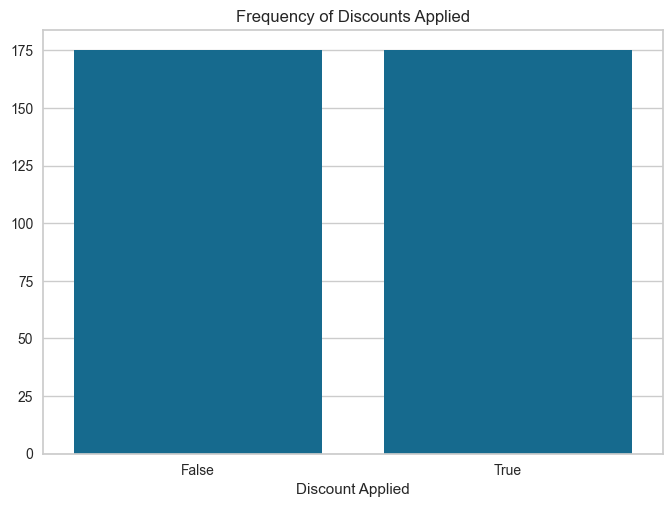

In [13]:
# Explore how often discounts are applied
discount_frequency = df['Discount Applied'].value_counts()
sns.barplot(x=discount_frequency.index, y=discount_frequency.values)
plt.title('Frequency of Discounts Applied')

In [14]:
# Analyze whether customers who receive discounts tend to spend more or have higher satisfaction
discount_vs_spend = df.groupby('Discount Applied')['Total Spend'].mean()
px.bar(x=discount_vs_spend.index, y=discount_vs_spend.values, labels={'x':'Discount Applied', 'y':'Average Spend'}, title='Average Spending with/without Discounts')

Text(0.5, 1.0, 'Distribution of Days Since Last Purchase')

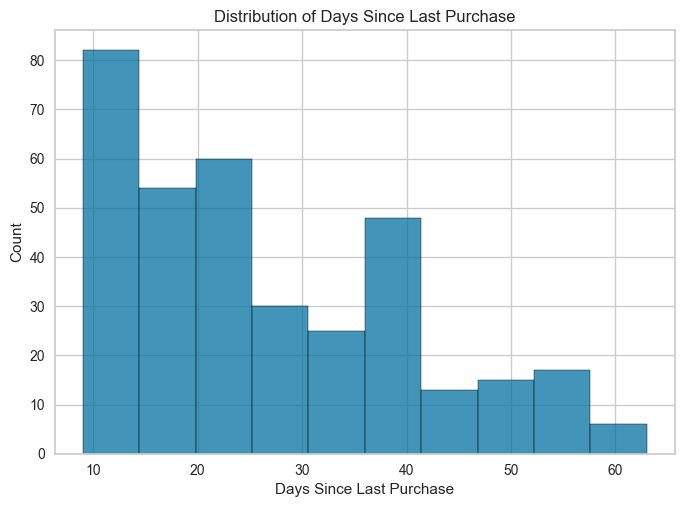

In [15]:
# Analyze the distribution of days since the last purchase
sns.histplot(df['Days Since Last Purchase'])
plt.title('Distribution of Days Since Last Purchase')

In [16]:
# Explore whether there is a relationship between the frequency of purchases and other variables
days_vs_spend = df.groupby('Days Since Last Purchase')['Total Spend'].mean()
px.bar(x=days_vs_spend.index, y=days_vs_spend.values, labels={'x':'Days Since Last Purchase', 'y':'Average Spend'}, title='Average Spending by Days Since Last Purchase')

Text(0.5, 1.0, 'Satisfaction Level Distribution')

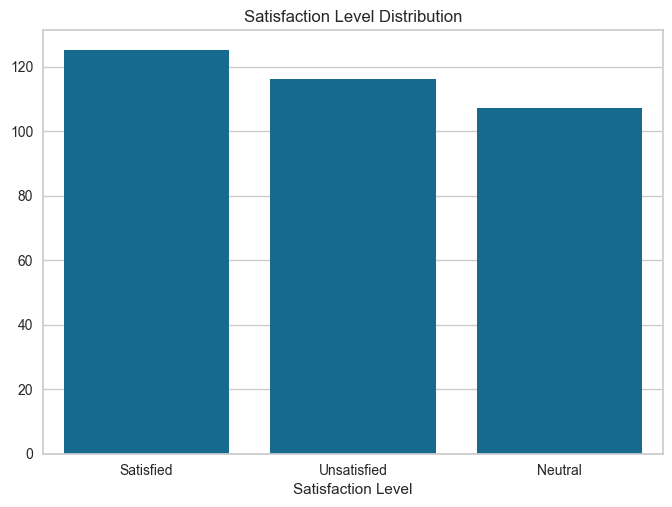

In [17]:
# Analyze the distribution of satisfaction levels
satisfaction_distribution = df['Satisfaction Level'].value_counts()
sns.barplot(x=satisfaction_distribution.index, y=satisfaction_distribution.values)
plt.title('Satisfaction Level Distribution')

In [18]:
# Explore correlations between satisfaction levels and other variables
satisfaction_vs_spend = df.groupby('Satisfaction Level')['Total Spend'].mean()
px.bar(x=satisfaction_vs_spend.index, y=satisfaction_vs_spend.values, labels={'x':'Satisfaction Level', 'y':'Average Spend'}, title='Average Spending by Satisfaction Level')

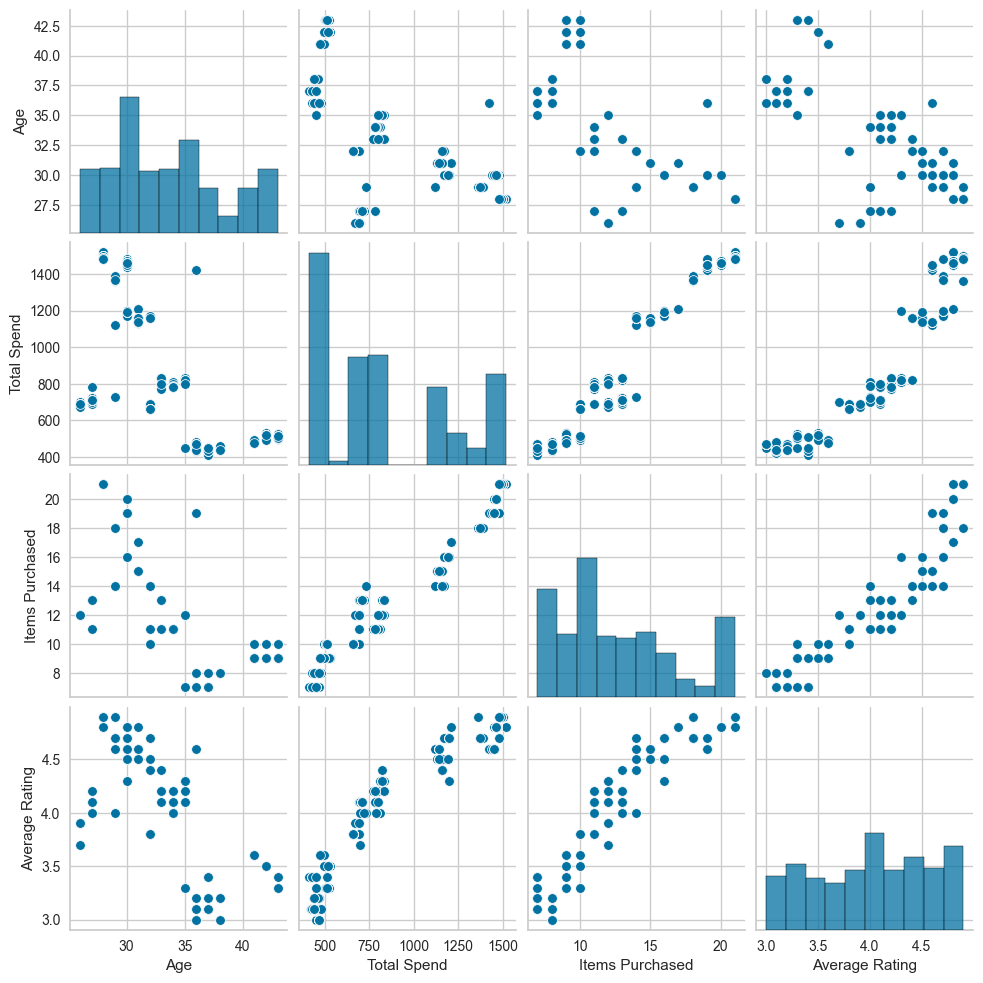

In [19]:
# Visualizing pairwise relationships between numeric columns
sns.pairplot(df[['Age', 'Total Spend', 'Items Purchased', 'Average Rating']])

<Axes: >

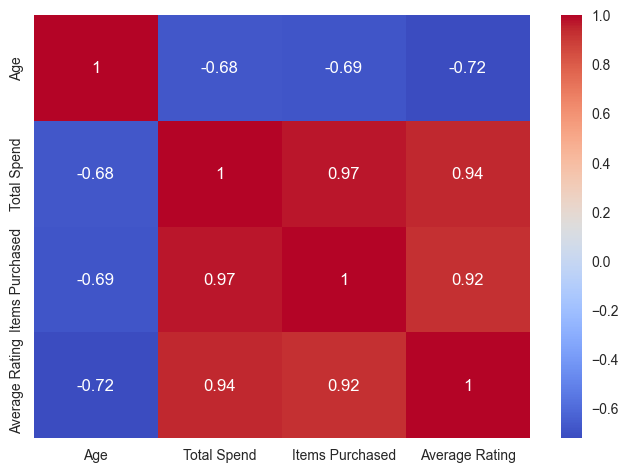

In [20]:
# Visualizing the correlation matrix as a heatmap
correlation_matrix = df[['Age', 'Total Spend', 'Items Purchased', 'Average Rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='Membership Type', ylabel='Total Spend'>

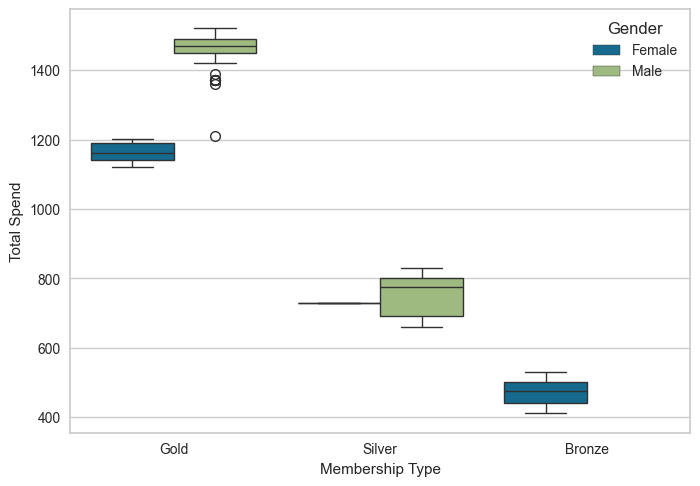

In [21]:
# Visualizing spending distribution based on Membership Type and Gender
sns.boxplot(x='Membership Type', y='Total Spend', hue='Gender', data=df)

<Axes: xlabel='City', ylabel='Items Purchased'>

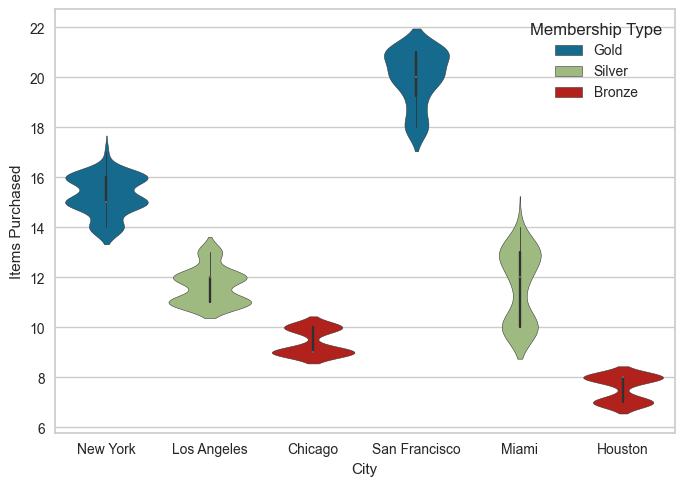

In [22]:
# Visualizing the distribution of items purchased based on City and Membership Type
sns.violinplot(x='City', y='Items Purchased', hue='Membership Type', data=df)

In [23]:
# Visualizing a 3D scatter plot
fig = px.scatter_3d(df, x='Age', y='Total Spend', z='Satisfaction Level', color='Satisfaction Level', size='Total Spend')
fig.update_layout(scene=dict(xaxis_title='Age', yaxis_title='Total Spend', zaxis_title='Satisfaction Level'))
fig.show()

Text(0.5, 1.0, 'Spending by Membership Type and Discount Applied')

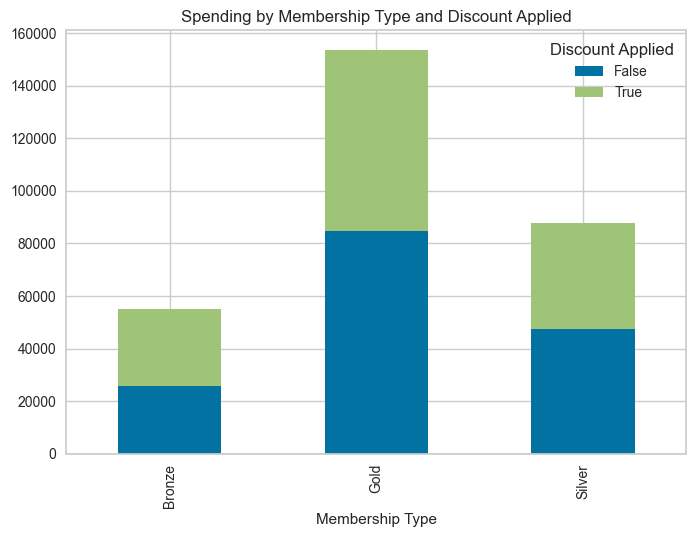

In [24]:
# Visualizing spending based on Membership Type and whether a discount was applied
df_grouped = df.groupby(['Membership Type', 'Discount Applied'])['Total Spend'].sum().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.title('Spending by Membership Type and Discount Applied')

In [25]:
X = df[['Total Spend', 'Age', 'Items Purchased']]

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

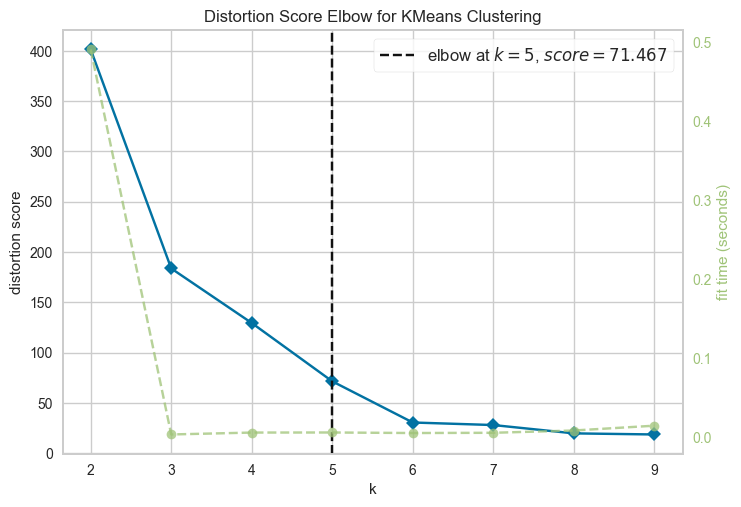

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Using the Elbow Method to find the optimal number of clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_scaled)
visualizer.show()

In [28]:
k = 5 
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster1'] = kmeans.fit_predict(X_scaled)

Text(0.5, 1.0, 'Total Spend by Cluster')

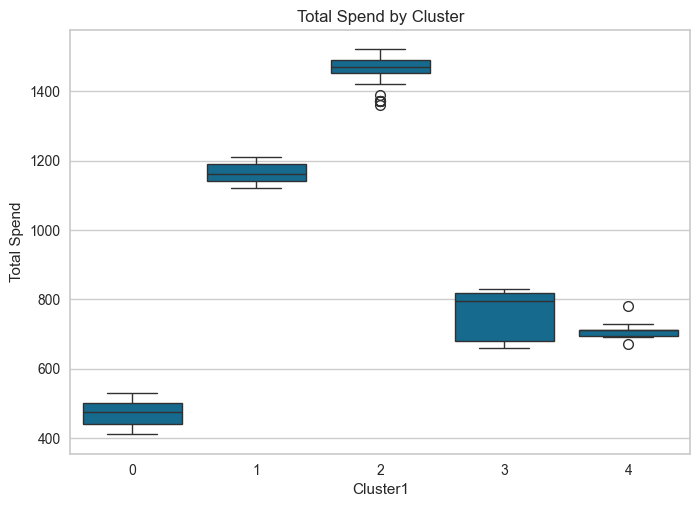

In [29]:
sns.boxplot(x='Cluster1', y='Total Spend', data=df)
plt.title('Total Spend by Cluster')

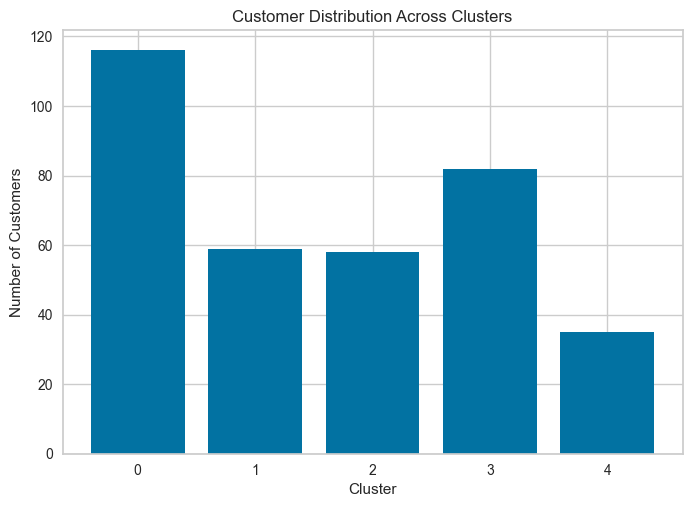

In [30]:
cluster_distribution = df['Cluster1'].value_counts().sort_index()

plt.bar(cluster_distribution.index, cluster_distribution.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution Across Clusters')
plt.show()

In [31]:
X_geo = df[['Total Spend', 'City']]
X_geo_encoded = pd.get_dummies(X_geo, columns=['City'])
scaler_geo = StandardScaler()
X_geo_scaled = scaler_geo.fit_transform(X_geo_encoded)

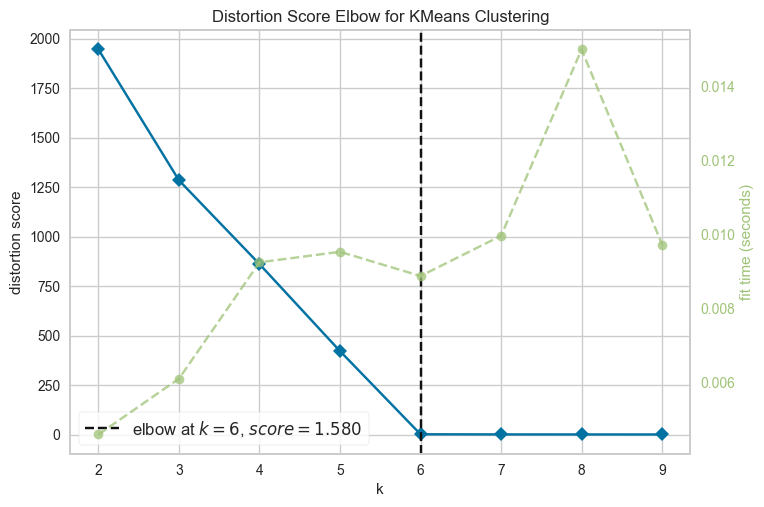

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
# Determine the optimal number of clusters using the Elbow Method
model_geo = KMeans()
visualizer_geo = KElbowVisualizer(model_geo, k=(2, 10))
visualizer_geo.fit(X_geo_scaled)
visualizer_geo.show()

In [33]:
k_geo = visualizer_geo.elbow_value_

# Fit the K-Means model with the chosen number of clusters
kmeans_geo = KMeans(n_clusters=k_geo, random_state=42)
df['GeoCluster'] = kmeans_geo.fit_predict(X_geo_scaled)

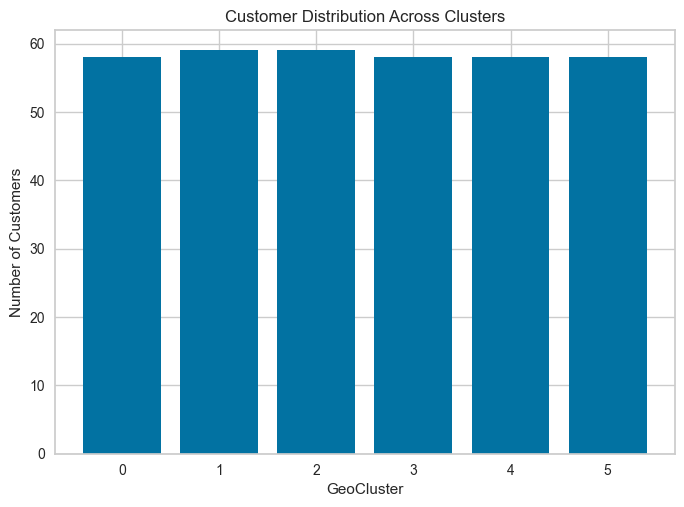

In [34]:
cluster_distribution = df['GeoCluster'].value_counts().sort_index()

plt.bar(cluster_distribution.index, cluster_distribution.values)
plt.xlabel('GeoCluster')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution Across Clusters')
plt.show()

In [35]:
X_engagement = df[['Days Since Last Purchase', 'Average Rating', 'Discount Applied']]
scaler_engagement = StandardScaler()
X_engagement_scaled = scaler_engagement.fit_transform(X_engagement)

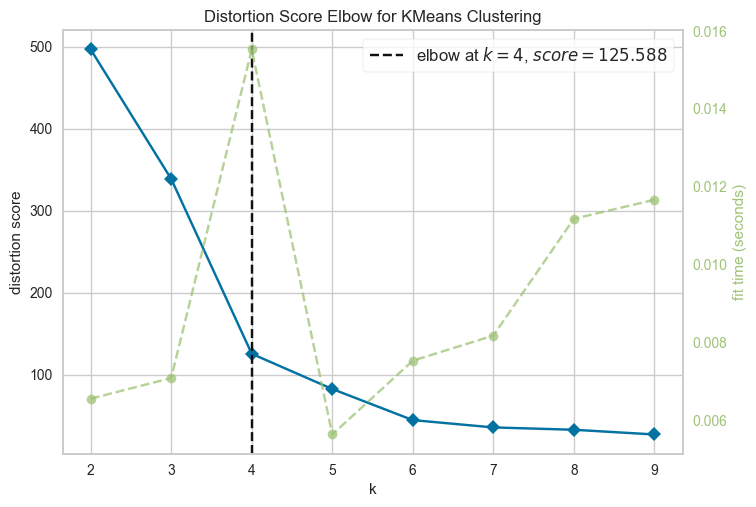

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
model_engagement = KMeans()
visualizer_engagement = KElbowVisualizer(model_engagement, k=(2, 10))
visualizer_engagement.fit(X_engagement_scaled)
visualizer_engagement.show()

In [37]:
# Choose the optimal number of clusters based on the Elbow Method
k_engagement = visualizer_engagement.elbow_value_

# Fit the K-Means model with the chosen number of clusters
kmeans_engagement = KMeans(n_clusters=k_engagement, random_state=42)
df['EngagementCluster'] = kmeans_engagement.fit_predict(X_engagement_scaled)


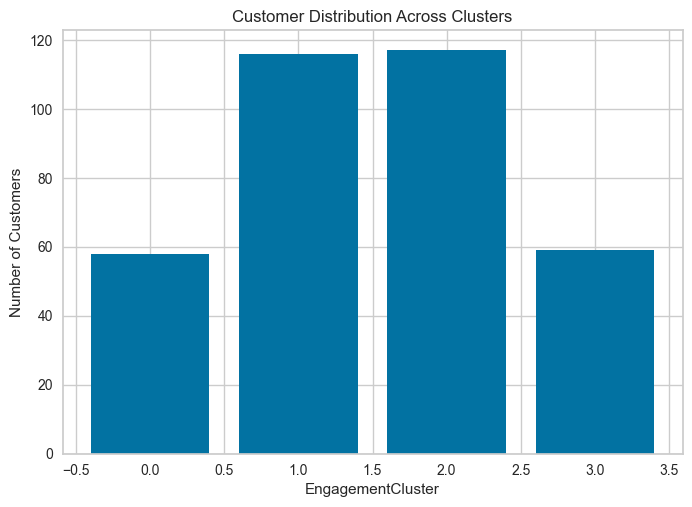

In [38]:
cluster_distribution = df['EngagementCluster'].value_counts().sort_index()

plt.bar(cluster_distribution.index, cluster_distribution.values)
plt.xlabel('EngagementCluster')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution Across Clusters')
plt.show()

In [39]:
X_seasonal = df[['Days Since Last Purchase', 'Total Spend']]
scaler_seasonal = StandardScaler()
X_seasonal_scaled = scaler_seasonal.fit_transform(X_seasonal)

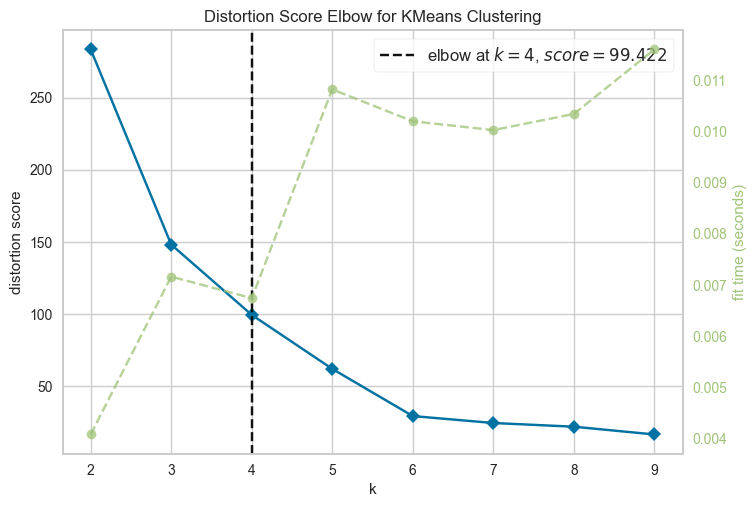

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
# Determine the optimal number of clusters using the Elbow Method
model_seasonal = KMeans()
visualizer_seasonal = KElbowVisualizer(model_seasonal, k=(2, 10))
visualizer_seasonal.fit(X_seasonal_scaled)
visualizer_seasonal.show()

In [41]:
# Choose the optimal number of clusters based on the Elbow Method
k_seasonal = visualizer_seasonal.elbow_value_

# Fit the K-Means model with the chosen number of clusters
kmeans_seasonal = KMeans(n_clusters=k_seasonal, random_state=42)
df['SeasonalCluster'] = kmeans_seasonal.fit_predict(X_seasonal_scaled)

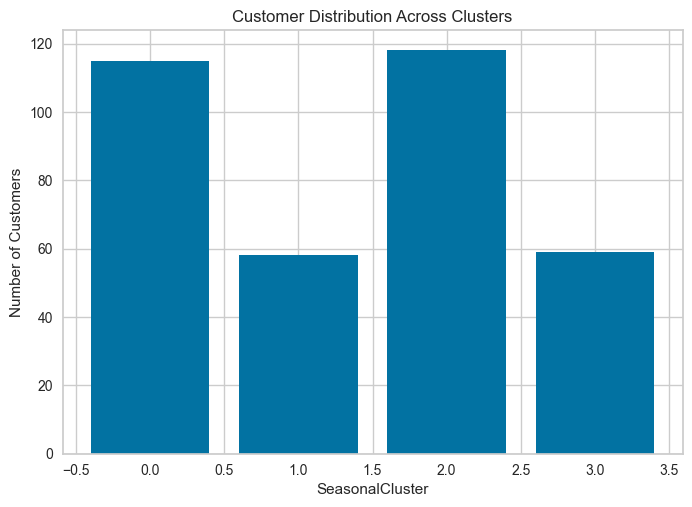

In [42]:
cluster_distribution = df['SeasonalCluster'].value_counts().sort_index()

plt.bar(cluster_distribution.index, cluster_distribution.values)
plt.xlabel('SeasonalCluster')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution Across Clusters')
plt.show()

In [43]:
X_channel = df[['Membership Type', 'Total Spend']]
X_channel_encoded = pd.get_dummies(X_channel, columns=['Membership Type'])
scaler_channel = StandardScaler()
X_channel_scaled = scaler_channel.fit_transform(X_channel_encoded)

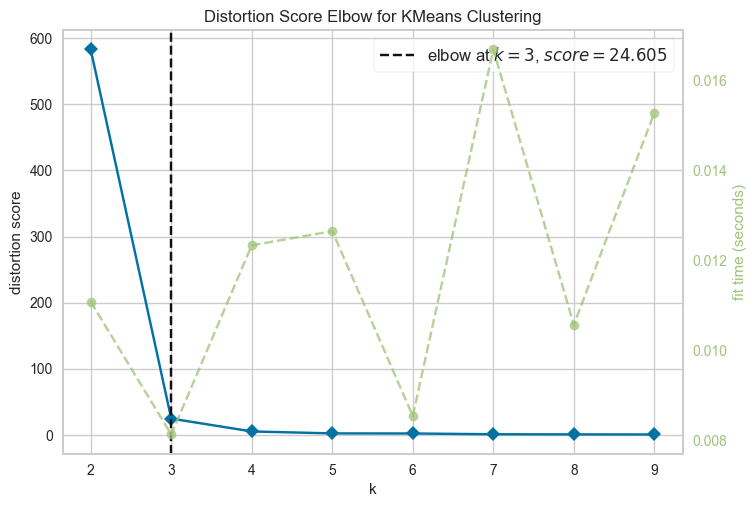

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
# Determine the optimal number of clusters using the Elbow Method
model_channel = KMeans()
visualizer_channel = KElbowVisualizer(model_channel, k=(2, 10))
visualizer_channel.fit(X_channel_scaled)
visualizer_channel.show()

In [45]:
# Choose the optimal number of clusters based on the Elbow Method
k_channel = visualizer_channel.elbow_value_

# Fit the K-Means model with the chosen number of clusters
kmeans_channel = KMeans(n_clusters=k_channel, random_state=42)
df['ChannelCluster'] = kmeans_channel.fit_predict(X_channel_scaled)

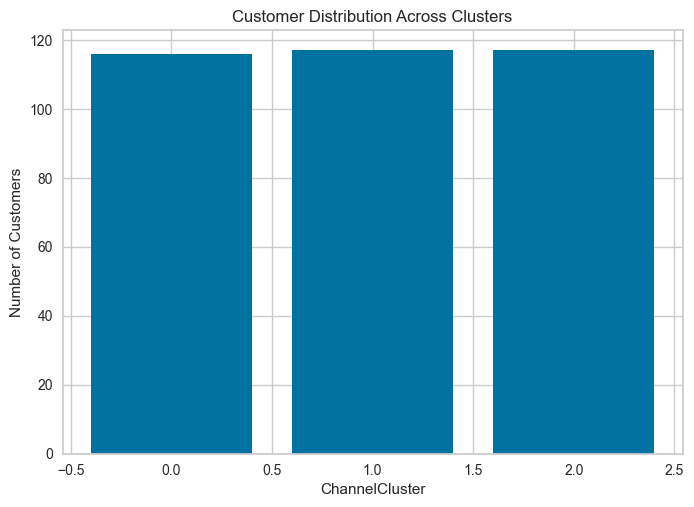

In [46]:
cluster_distribution = df['ChannelCluster'].value_counts().sort_index()

plt.bar(cluster_distribution.index, cluster_distribution.values)
plt.xlabel('ChannelCluster')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution Across Clusters')
plt.show()